In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_fwf('curr_access.txt', delimiter=' ')
df.head(15)

,2018-01-26,09:55:03,/ 1 8 97.105.19.61,Unnamed: 3
0,2018-01-26,09:56:02,java-ii 1 8 97.105.19.61,NaN
1,2018-01-26,09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN
2,2018-01-26,09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN
3,2018-01-26,09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN
4,2018-01-26,09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN
5,2018-01-26,09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN
6,2018-01-26,09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN
7,2018-01-26,09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN
8,2018-01-26,09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN
9,2018-01-26,09:59:22,mkdocs/search_index.json 5 22 97.105.19.61,NaN


In [3]:
df.shape

(233527, 4)

In [4]:
df.rename(index=str, columns={'2018-01-26':'date', '09:55:03':'time', '/ 1 8 97.105.19.61':'stuff'}, inplace=True)

In [5]:
df['program'], df['user'], df['cohort'], df['ip'] = df['stuff'].str.split(' ').str

In [6]:
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip
0,2018-01-26,09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61
1,2018-01-26,09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61
2,2018-01-26,09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61
3,2018-01-26,09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61
4,2018-01-26,09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61
5,2018-01-26,09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61
6,2018-01-26,09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61
7,2018-01-26,09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61
8,2018-01-26,09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61
9,2018-01-26,09:59:22,mkdocs/search_index.json 5 22 97.105.19.61,NaN,mkdocs/search_index.json,5,22,97.105.19.61


In [7]:
df[df.ip == '24.243']

,date,time,stuff,Unnamed: 3,program,user,cohort,ip
87665,2018-07-19,13:42:14,content/php_i/types-and-variables-i/intergers-...,59.95,content/php_i/types-and-variables-i/intergers-...,5,22,24.243


In [8]:
df.dtypes

date          object
time          object
stuff         object
Unnamed: 3    object
program       object
user          object
cohort        object
ip            object
dtype: object

In [9]:
df[df.ip.str.len() < 7]

,date,time,stuff,Unnamed: 3,program,user,cohort,ip
886,2018-01-28,16:16:57,content/php_i/types-and-variables-i/introducti...,179.161.39,content/php_i/types-and-variables-i/introducti...,51,13,72
2152,2018-01-30,12:45:42,content/php_iv/classes-and-objects-ii/gitbook/...,.171.117.210,content/php_iv/classes-and-objects-ii/gitbook/...,69,14,19
2410,2018-01-30,20:30:19,content/php_i/types-and-variables-i/introducti...,179.161.39,content/php_i/types-and-variables-i/introducti...,51,13,72
3684,2018-02-01,14:09:08,content/mysql/aliases-and-functions/gitbook/im...,5.19.61,content/mysql/aliases-and-functions/gitbook/im...,70,19,97.1
7782,2018-02-09,12:11:38,content/php_iv/classes-and-objects-ii/gitbook/...,197.199.226,content/php_iv/classes-and-objects-ii/gitbook/...,93,13,12
7790,2018-02-09,12:12:18,content/php_iii/php-with-html/view-controller-...,.199.226,content/php_iii/php-with-html/view-controller-...,93,13,12.19
7885,2018-02-09,15:51:25,content/mysql/aliases-and-functions/gitbook/im...,0.214.161,content/mysql/aliases-and-functions/gitbook/im...,94,19,50.2
7913,2018-02-09,16:47:32,content/php_iii/classes-and-objects-i/gitbook/...,197.199.226,content/php_iii/classes-and-objects-i/gitbook/...,93,13,12
7933,2018-02-09,17:05:59,content/php_iv/classes-and-objects-ii/late-sta...,7.199.226,content/php_iv/classes-and-objects-ii/late-sta...,93,13,12.1
8343,2018-02-11,16:57:28,content/php_iv/classes-and-objects-ii/gitbook/...,26.254.147,content/php_iv/classes-and-objects-ii/gitbook/...,50,13,24


In [10]:
df['timestamp'] = df['date'] + ' ' + df['time']

In [11]:
df.head(3)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,timestamp
0,2018-01-26,09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,2018-01-26 09:56:02
1,2018-01-26,09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,2018-01-26 09:56:05
2,2018-01-26,09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,2018-01-26 09:56:06


In [12]:
df.timestamp = pd.to_datetime(df.timestamp)
df.dtypes

date                  object
time                  object
stuff                 object
Unnamed: 3            object
program               object
user                  object
cohort                object
ip                    object
timestamp     datetime64[ns]
dtype: object

In [13]:
df.set_index('timestamp', inplace=True)
df.head(3)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip
timestamp,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61


In [14]:
df.date = pd.to_datetime(df.date)
df.time = pd.to_datetime(df.time)
df.dtypes

date          datetime64[ns]
time          datetime64[ns]
stuff                 object
Unnamed: 3            object
program               object
user                  object
cohort                object
ip                    object
dtype: object

In [24]:
df.user.value_counts()

53     5807
64     4757
11     4229
344    2750
1      2629
277    2238
127    2220
304    2034
274    2013
186    1978
272    1944
269    1883
197    1871
263    1850
25     1780
275    1770
7      1768
190    1730
195    1701
5      1694
234    1679
183    1659
302    1657
270    1643
215    1616
211    1616
3      1540
192    1538
2      1528
264    1517
       ... 
77       10
84       10
95        9
141       9
107       8
104       8
388       8
396       7
115       6
214       6
152       5
311       5
71        5
169       5
82        5
216       4
62        4
85        4
246       4
176       3
177       3
81        3
89        3
348       3
97        2
165       1
66        1
316       1
212       1
163       1
Name: user, Length: 398, dtype: int64

Looking below, this seems to support that the cohort column is correctly labeled.  The blank might be the admin.  What about the nan's?  Drop?

In [25]:
df.cohort.value_counts()

24                 34469
22                 28243
23                 26614
25                 24676
26                 24088
29                 20471
27                 19245
                   14306
1                   8858
14                  6514
21                  6464
28                  6161
31                  2997
13                  2123
17                  1788
8                   1669
18                  1474
19                   899
16                   740
15                   610
7                    338
12                   227
nan                  131
2                     94
11                    79
6                     60
97.105.19.61          10
72                     7
97.105.19.58           7
68                     7
                   ...  
99.203.26.199          1
108.65.244.91          1
65.204.10.233          1
76.185.157.10          1
249                    1
70.94.162.244          1
5                      1
136.50.29.193          1
103                    1


In [26]:
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2019-04-30 09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26,2019-04-30 09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:06,2018-01-26,2019-04-30 09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:24,2018-01-26,2019-04-30 09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:41,2018-01-26,2019-04-30 09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:46,2018-01-26,2019-04-30 09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:48,2018-01-26,2019-04-30 09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:59,2018-01-26,2019-04-30 09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:58:26,2018-01-26,2019-04-30 09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61,NaN,NaN,NaN,NaN


In [27]:
df[df.cohort.isnull()]

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-03-20 10:36:37,2018-03-20,2019-04-30 10:36:37,content/php_i/intro-via-interactive-shell/gitb...,4.160.159.122,content/php_i/intro-via-interactive-shell/gitb...,54,NaN,NaN,4.160.159.122,NaN,NaN,NaN
2018-04-05 14:31:05,2018-04-05,2019-04-30 14:31:05,content/php_i/intro-via-interactive-shell/gitb...,97.105.19.61,content/php_i/intro-via-interactive-shell/gitb...,141,NaN,NaN,97.105.19.61,NaN,NaN,NaN
2018-04-23 16:00:44,2018-04-23,2019-04-30 16:00:44,content/php_i/intro-via-interactive-shell/gitb...,7.105.19.61,content/php_i/intro-via-interactive-shell/gitb...,61,NaN,NaN,7.105.19.61,NaN,NaN,NaN
2018-04-24 10:08:28,2018-04-24,2019-04-30 10:08:28,content/php_i/intro-via-interactive-shell/gitb...,7.105.19.61,content/php_i/intro-via-interactive-shell/gitb...,61,NaN,NaN,7.105.19.61,NaN,NaN,NaN
2018-04-26 15:12:47,2018-04-26,2019-04-30 15:12:47,content/php_i/intro-via-interactive-shell/doin...,97.105.19.61,content/php_i/intro-via-interactive-shell/doin...,61,NaN,NaN,97.105.19.61,NaN,NaN,NaN
2018-04-26 15:23:14,2018-04-26,2019-04-30 15:23:14,content/php_i/types-and-variables-ii/intro-to-...,7.105.19.61,content/php_i/types-and-variables-ii/intro-to-...,61,NaN,NaN,7.105.19.61,NaN,NaN,NaN
2018-05-29 15:25:50,2018-05-29,2019-04-30 15:25:50,content/appendix/further-reading/javascript/gi...,97.105.19.61,content/appendix/further-reading/javascript/gi...,1,NaN,NaN,97.105.19.61,NaN,NaN,NaN
2018-10-17 23:42:33,2018-10-17,2019-04-30 23:42:33,content/php_i/types-and-variables-ii/intro-to-...,104.58.135.163,content/php_i/types-and-variables-ii/intro-to-...,280,NaN,NaN,104.58.135.163,NaN,NaN,NaN
2018-10-17 23:51:22,2018-10-17,2019-04-30 23:51:22,content/php_i/types-and-variables-ii/intro-to-...,104.58.135.163,content/php_i/types-and-variables-ii/intro-to-...,280,NaN,NaN,104.58.135.163,NaN,NaN,NaN


In [28]:
df['user_1'], df['cohort_1'], df['ip_1'], df['blank'] = df['Unnamed: 3'].str.split(' ').str

In [29]:
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2019-04-30 09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26,2019-04-30 09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:06,2018-01-26,2019-04-30 09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:24,2018-01-26,2019-04-30 09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:41,2018-01-26,2019-04-30 09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:46,2018-01-26,2019-04-30 09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:48,2018-01-26,2019-04-30 09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:59,2018-01-26,2019-04-30 09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:58:26,2018-01-26,2019-04-30 09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61,NaN,NaN,NaN,NaN


In [30]:
df.isnull().sum()

date               0
time               0
stuff              0
Unnamed: 3    230115
program            0
user            2114
cohort            16
ip              2300
user_1        230115
cohort_1      231319
ip_1          231415
blank         233455
dtype: int64

In [31]:
df['cohort'] = df['cohort'].fillna(df['cohort_1'])
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2019-04-30 09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26,2019-04-30 09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:06,2018-01-26,2019-04-30 09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:24,2018-01-26,2019-04-30 09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:41,2018-01-26,2019-04-30 09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:46,2018-01-26,2019-04-30 09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:48,2018-01-26,2019-04-30 09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:59,2018-01-26,2019-04-30 09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:58:26,2018-01-26,2019-04-30 09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61,NaN,NaN,NaN,NaN


In [32]:
df['user'] = df['user'].fillna(df['user_1'])
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2019-04-30 09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26,2019-04-30 09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:06,2018-01-26,2019-04-30 09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:24,2018-01-26,2019-04-30 09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:41,2018-01-26,2019-04-30 09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:46,2018-01-26,2019-04-30 09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:48,2018-01-26,2019-04-30 09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:59,2018-01-26,2019-04-30 09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:58:26,2018-01-26,2019-04-30 09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61,NaN,NaN,NaN,NaN


In [33]:
df['ip'] = df['ip'].fillna(df['ip_1'])
df.head(15)

,date,time,stuff,Unnamed: 3,program,user,cohort,ip,user_1,cohort_1,ip_1,blank
timestamp,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,2019-04-30 09:56:02,java-ii 1 8 97.105.19.61,NaN,java-ii,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:05,2018-01-26,2019-04-30 09:56:05,java-ii/object-oriented-programming 1 8 97.105...,NaN,java-ii/object-oriented-programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:06,2018-01-26,2019-04-30 09:56:06,slides/object_oriented_programming 1 8 97.105....,NaN,slides/object_oriented_programming,1,8,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:24,2018-01-26,2019-04-30 09:56:24,javascript-i/conditionals 2 22 97.105.19.61,NaN,javascript-i/conditionals,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:41,2018-01-26,2019-04-30 09:56:41,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:46,2018-01-26,2019-04-30 09:56:46,javascript-i/conditionals 3 22 97.105.19.61,NaN,javascript-i/conditionals,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:48,2018-01-26,2019-04-30 09:56:48,javascript-i/functions 3 22 97.105.19.61,NaN,javascript-i/functions,3,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:56:59,2018-01-26,2019-04-30 09:56:59,javascript-i/loops 2 22 97.105.19.61,NaN,javascript-i/loops,2,22,97.105.19.61,NaN,NaN,NaN,NaN
2018-01-26 09:58:26,2018-01-26,2019-04-30 09:58:26,javascript-i/functions 4 22 97.105.19.61,NaN,javascript-i/functions,4,22,97.105.19.61,NaN,NaN,NaN,NaN


In [34]:
df.isnull().sum()

date               0
time               0
stuff              0
Unnamed: 3    230115
program            0
user               0
cohort            16
ip               188
user_1        230115
cohort_1      231319
ip_1          231415
blank         233455
dtype: int64

In [35]:
df = df.drop(columns=['Unnamed: 3', 'blank', 'user_1', 'cohort_1', 'ip_1'])
df.isnull().sum()

date         0
time         0
stuff        0
program      0
user         0
cohort      16
ip         188
dtype: int64

In [36]:
df[df.cohort.isnull()]

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2018-03-20 10:36:37,2018-03-20,2019-04-30 10:36:37,content/php_i/intro-via-interactive-shell/gitb...,content/php_i/intro-via-interactive-shell/gitb...,54,NaN,NaN
2018-04-05 14:31:05,2018-04-05,2019-04-30 14:31:05,content/php_i/intro-via-interactive-shell/gitb...,content/php_i/intro-via-interactive-shell/gitb...,141,NaN,NaN
2018-04-23 16:00:44,2018-04-23,2019-04-30 16:00:44,content/php_i/intro-via-interactive-shell/gitb...,content/php_i/intro-via-interactive-shell/gitb...,61,NaN,NaN
2018-04-24 10:08:28,2018-04-24,2019-04-30 10:08:28,content/php_i/intro-via-interactive-shell/gitb...,content/php_i/intro-via-interactive-shell/gitb...,61,NaN,NaN
2018-04-26 15:12:47,2018-04-26,2019-04-30 15:12:47,content/php_i/intro-via-interactive-shell/doin...,content/php_i/intro-via-interactive-shell/doin...,61,NaN,NaN
2018-04-26 15:23:14,2018-04-26,2019-04-30 15:23:14,content/php_i/types-and-variables-ii/intro-to-...,content/php_i/types-and-variables-ii/intro-to-...,61,NaN,NaN
2018-05-29 15:25:50,2018-05-29,2019-04-30 15:25:50,content/appendix/further-reading/javascript/gi...,content/appendix/further-reading/javascript/gi...,1,NaN,NaN
2018-10-17 23:42:33,2018-10-17,2019-04-30 23:42:33,content/php_i/types-and-variables-ii/intro-to-...,content/php_i/types-and-variables-ii/intro-to-...,280,NaN,NaN
2018-10-17 23:51:22,2018-10-17,2019-04-30 23:51:22,content/php_i/types-and-variables-ii/intro-to-...,content/php_i/types-and-variables-ii/intro-to-...,280,NaN,NaN


In [37]:
cohort_24 = df[df.cohort == '24']
cohort_24.head()

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2018-05-29 14:42:38,2018-05-29,2019-04-30 14:42:38,/ 182 24 97.105.19.61,/,182,24,97.105.19.61
2018-05-29 14:42:39,2018-05-29,2019-04-30 14:42:39,/ 183 24 97.105.19.61,/,183,24,97.105.19.61
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 184 24 97.105.19.61,/,184,24,97.105.19.61
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 185 24 97.105.19.61,/,185,24,97.105.19.61
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 186 24 97.105.19.61,/,186,24,97.105.19.61


In [38]:
cohort_24['user'] = pd.to_numeric(cohort_24.user)
cohort_24['cohort'] = pd.to_numeric(cohort_24.cohort)
cohort_24.dtypes

date       datetime64[ns]
time       datetime64[ns]
stuff              object
program            object
user                int64
cohort              int64
ip                 object
dtype: object

In [39]:
cohort_24.tail()

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2019-03-29 17:28:34,2019-03-29,2019-04-30 17:28:34,spring 186 24 99.158.248.205,spring,186,24,99.158.248.205
2019-03-29 17:28:37,2019-03-29,2019-04-30 17:28:37,spring/setup 186 24 99.158.248.205,spring/setup,186,24,99.158.248.205
2019-03-29 17:34:38,2019-03-29,2019-04-30 17:34:38,spring/fundamentals/controllers 186 24 99.158....,spring/fundamentals/controllers,186,24,99.158.248.205
2019-03-29 17:42:08,2019-03-29,2019-04-30 17:42:08,spring/fundamentals/controllers 186 24 99.158....,spring/fundamentals/controllers,186,24,99.158.248.205
2019-03-29 17:42:19,2019-03-29,2019-04-30 17:42:19,spring/fundamentals/views 186 24 99.158.248.205,spring/fundamentals/views,186,24,99.158.248.205


In [40]:
cohort_24['date'].value_counts()

2018-08-17    917
2018-08-13    734
2018-08-27    726
2018-08-06    686
2018-06-12    677
2018-08-14    669
2018-07-23    659
2018-06-21    577
2018-06-01    576
2018-08-09    561
2018-06-11    559
2018-06-04    554
2018-07-24    554
2018-08-23    539
2018-07-09    536
2018-06-29    516
2018-06-26    504
2018-08-10    503
2018-09-05    498
2018-08-07    479
2018-08-15    462
2018-08-01    459
2018-07-31    453
2018-07-11    438
2018-08-02    436
2018-07-03    436
2018-07-12    436
2018-07-25    408
2018-08-20    406
2018-06-28    406
             ... 
2019-02-14      4
2019-01-31      4
2018-11-26      4
2018-10-27      4
2018-11-15      4
2018-11-28      4
2018-12-28      4
2019-02-02      3
2018-10-03      3
2019-03-18      3
2019-02-20      3
2019-02-16      3
2019-02-04      3
2018-12-06      3
2018-11-29      3
2018-12-30      2
2018-11-27      2
2019-03-13      2
2019-02-07      1
2019-02-21      1
2019-03-05      1
2019-02-08      1
2019-02-22      1
2018-12-14      1
2019-02-06

In [41]:
cohort_24['running_days'] = cohort_24['date'] - (cohort_24['date'][0])
cohort_24.sample(15)

,date,time,stuff,program,user,cohort,ip,running_days
timestamp,,,,,,,,
2018-07-03 13:50:05,2018-07-03,2019-04-30 13:50:05,examples/css/login-form.html 182 24 97.105.19.61,examples/css/login-form.html,182,24,97.105.19.61,35 days
2018-08-01 11:48:48,2018-08-01,2019-04-30 11:48:48,/ 204 24 97.105.19.58,/,204,24,97.105.19.58,64 days
2018-07-13 08:14:07,2018-07-13,2019-04-30 08:14:07,java-i/syntax-types-and-variables 187 24 97.10...,java-i/syntax-types-and-variables,187,24,97.105.19.61,45 days
2018-08-16 11:44:13,2018-08-16,2019-04-30 11:44:13,/ 186 24 97.105.19.58,/,186,24,97.105.19.58,79 days
2018-08-03 08:52:03,2018-08-03,2019-04-30 08:52:03,slides/annotations 192 24 97.105.19.58,slides/annotations,192,24,97.105.19.58,66 days
2018-08-17 10:45:19,2018-08-17,2019-04-30 10:45:19,/ 201 24 97.105.19.58,/,201,24,97.105.19.58,80 days
2018-07-17 11:45:21,2018-07-17,2019-04-30 11:45:21,javascript-ii/npm 182 24 97.105.19.58,javascript-ii/npm,182,24,97.105.19.58,49 days
2018-09-04 10:16:50,2018-09-04,2019-04-30 10:16:50,mysql 215 24 97.105.19.58,mysql,215,24,97.105.19.58,98 days
2018-08-21 09:52:30,2018-08-21,2019-04-30 09:52:30,java-iii/mvc 215 24 97.105.19.58,java-iii/mvc,215,24,97.105.19.58,84 days


In [42]:
cohort_24.dtypes

date             datetime64[ns]
time             datetime64[ns]
stuff                    object
program                  object
user                      int64
cohort                    int64
ip                       object
running_days    timedelta64[ns]
dtype: object

In [43]:
cohort_24['running_days'] = (cohort_24['running_days']/np.timedelta64(1, 'D')).astype(int)

In [44]:
cohort_24.head()

,date,time,stuff,program,user,cohort,ip,running_days
timestamp,,,,,,,,
2018-05-29 14:42:38,2018-05-29,2019-04-30 14:42:38,/ 182 24 97.105.19.61,/,182,24,97.105.19.61,0
2018-05-29 14:42:39,2018-05-29,2019-04-30 14:42:39,/ 183 24 97.105.19.61,/,183,24,97.105.19.61,0
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 184 24 97.105.19.61,/,184,24,97.105.19.61,0
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 185 24 97.105.19.61,/,185,24,97.105.19.61,0
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 186 24 97.105.19.61,/,186,24,97.105.19.61,0


In [45]:
cohort_24.dtypes

date            datetime64[ns]
time            datetime64[ns]
stuff                   object
program                 object
user                     int64
cohort                   int64
ip                      object
running_days             int64
dtype: object

In [46]:
cohort_24 = cohort_24[cohort_24.user < 214]

In [47]:
cohort_24[cohort_24.running_days > 200]

,date,time,stuff,program,user,cohort,ip,running_days
timestamp,,,,,,,,
2018-12-16 15:47:35,2018-12-16,2019-04-30 15:47:35,/ 186 24 99.158.248.205,/,186,24,99.158.248.205,201
2018-12-16 15:47:39,2018-12-16,2019-04-30 15:47:39,spring 186 24 99.158.248.205,spring,186,24,99.158.248.205,201
2018-12-16 15:47:42,2018-12-16,2019-04-30 15:47:42,spring/setup 186 24 99.158.248.205,spring/setup,186,24,99.158.248.205,201
2018-12-16 15:52:45,2018-12-16,2019-04-30 15:52:45,spring/fundamentals/controllers 186 24 99.158....,spring/fundamentals/controllers,186,24,99.158.248.205,201
2018-12-16 15:52:50,2018-12-16,2019-04-30 15:52:50,spring/fundamentals/views 186 24 99.158.248.205,spring/fundamentals/views,186,24,99.158.248.205,201
2018-12-16 16:15:03,2018-12-16,2019-04-30 16:15:03,spring/setup 186 24 99.158.248.205,spring/setup,186,24,99.158.248.205,201
2018-12-17 14:42:10,2018-12-17,2019-04-30 14:42:10,java-i/control-statements-and-loops 187 24 4.1...,java-i/control-statements-and-loops,187,24,4.16.216.161,202
2018-12-17 14:42:27,2018-12-17,2019-04-30 14:42:27,java-i/strings 187 24 4.16.216.161,java-i/strings,187,24,4.16.216.161,202
2018-12-17 14:42:47,2018-12-17,2019-04-30 14:42:47,java-i/methods 187 24 4.16.216.161,java-i/methods,187,24,4.16.216.161,202


In [48]:
cohort_24.groupby(cohort_24.date).count()

,time,stuff,program,user,cohort,ip,running_days
date,,,,,,,
2018-05-29,104,104,104,104,104,104,104
2018-05-30,324,324,324,324,324,324,324
2018-05-31,355,355,355,355,355,355,355
2018-06-01,576,576,576,576,576,576,576
2018-06-02,53,53,53,53,53,53,53
2018-06-03,83,83,83,83,83,83,83
2018-06-04,554,554,554,554,554,554,554
2018-06-05,230,230,230,230,230,230,230
2018-06-06,251,251,251,251,251,251,251


In [49]:
cohort_24['day_of_week'] = cohort_24['date'].dt.day_name()
cohort_24.sample(10)

,date,time,stuff,program,user,cohort,ip,running_days,day_of_week
timestamp,,,,,,,,,
2018-07-24 11:43:48,2018-07-24,2019-04-30 11:43:48,java-i/console-io 183 24 97.105.19.58,java-i/console-io,183,24,97.105.19.58,56,Tuesday
2018-07-03 14:45:16,2018-07-03,2019-04-30 14:45:16,jquery/ajax 201 24 97.105.19.61,jquery/ajax,201,24,97.105.19.61,35,Tuesday
2018-08-25 23:15:19,2018-08-25,2019-04-30 23:15:19,toc 195 24 104.53.202.214,toc,195,24,104.53.202.214,88,Saturday
2018-08-10 11:57:16,2018-08-10,2019-04-30 11:57:16,mysql/databases 190 24 97.105.19.58,mysql/databases,190,24,97.105.19.58,73,Friday
2018-08-09 13:46:43,2018-08-09,2019-04-30 13:46:43,mysql/introduction 203 24 97.105.19.58,mysql/introduction,203,24,97.105.19.58,72,Thursday
2018-06-19 14:59:09,2018-06-19,2019-04-30 14:59:09,javascript-i/bom-and-dom/dom 186 24 97.105.19.61,javascript-i/bom-and-dom/dom,186,24,97.105.19.61,21,Tuesday
2018-06-05 13:07:31,2018-06-05,2019-04-30 13:07:31,html-css/css-ii/grids 200 24 97.105.19.61,html-css/css-ii/grids,200,24,97.105.19.61,7,Tuesday
2018-08-17 09:23:29,2018-08-17,2019-04-30 09:23:29,mysql/users 207 24 97.105.19.58,mysql/users,207,24,97.105.19.58,80,Friday
2018-09-14 10:51:16,2018-09-14,2019-04-30 10:51:16,appendix/capstone-workbook 204 24 97.105.19.58,appendix/capstone-workbook,204,24,97.105.19.58,108,Friday


In [50]:
cohort_24.groupby(cohort_24.day_of_week)['date'].count()

day_of_week
Friday       5121
Monday       7208
Saturday      811
Sunday       1237
Thursday     5777
Tuesday      6474
Wednesday    5447
Name: date, dtype: int64

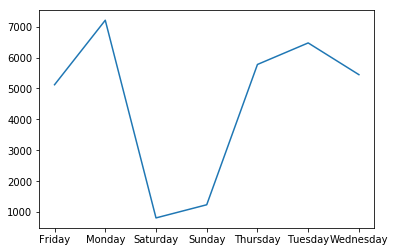

In [51]:
plt.plot(cohort_24.groupby(cohort_24.day_of_week)['date'].count())

In [52]:
cohort_24_over_130 = cohort_24[cohort_24.running_days > 130]
cohort_24_over_130.shape

(1738, 9)

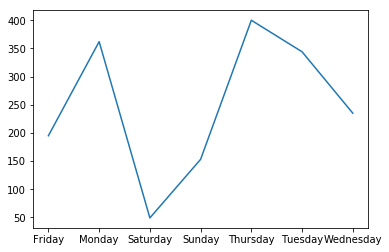

In [53]:
plt.plot(cohort_24_over_130.groupby(cohort_24_over_130.day_of_week)['date'].count())

In [54]:
cohort_24.groupby(cohort_24.user)['date'].count()

user
182     856
183    1674
184    1023
185    1111
186    2002
187    1297
188    1482
189    1510
190    1747
191    1239
192    1546
193    1025
194     927
195    1714
196    1153
197    1894
198     705
199    1408
200     760
201     755
202     365
203    1083
204    1351
205     886
206     469
207     969
208    1124
Name: date, dtype: int64

In [55]:
cohort_24_under_130 = cohort_24[cohort_24.running_days <= 130]
cohort_24_under_130.shape

(30337, 9)

In [56]:
cohort_24_under_130.sample(10)

,date,time,stuff,program,user,cohort,ip,running_days,day_of_week
timestamp,,,,,,,,,
2018-07-16 11:10:50,2018-07-16,2019-04-30 11:10:50,javascript-ii 207 24 97.105.19.58,javascript-ii,207,24,97.105.19.58,48,Monday
2018-07-10 08:48:16,2018-07-10,2019-04-30 08:48:16,jquery/ajax/weather-map 193 24 97.105.19.61,jquery/ajax/weather-map,193,24,97.105.19.61,42,Tuesday
2018-09-10 13:12:52,2018-09-10,2019-04-30 13:12:52,mysql 208 24 97.105.19.58,mysql,208,24,97.105.19.58,104,Monday
2018-08-18 13:01:08,2018-08-18,2019-04-30 13:01:08,mysql/extra-exercises 188 24 72.191.31.35,mysql/extra-exercises,188,24,72.191.31.35,81,Saturday
2018-08-13 10:05:52,2018-08-13,2019-04-30 10:05:52,mysql/databases 197 24 97.105.19.58,mysql/databases,197,24,97.105.19.58,76,Monday
2018-08-13 11:50:30,2018-08-13,2019-04-30 11:50:30,mysql 188 24 97.105.19.58,mysql,188,24,97.105.19.58,76,Monday
2018-07-18 11:00:06,2018-07-18,2019-04-30 11:00:06,mkdocs/search_index.json 190 24 97.105.19.58,mkdocs/search_index.json,190,24,97.105.19.58,50,Wednesday
2018-08-13 15:03:28,2018-08-13,2019-04-30 15:03:28,mysql/clauses/where 205 24 97.105.19.58,mysql/clauses/where,205,24,97.105.19.58,76,Monday
2018-07-10 21:45:58,2018-07-10,2019-04-30 21:45:58,jquery/events 204 24 68.206.106.64,jquery/events,204,24,68.206.106.64,42,Tuesday


In [57]:
cohort_24_under_130.groupby(cohort_24_under_130.user)['date'].count()

user
182     856
183    1618
184    1006
185    1046
186    1459
187    1204
188    1306
189    1203
190    1724
191    1239
192    1546
193    1002
194     927
195    1596
196    1153
197    1785
198     615
199    1408
200     756
201     687
202     365
203    1083
204    1321
205     886
206     463
207     969
208    1114
Name: date, dtype: int64

In [58]:
cohort_24_over_130.groupby(cohort_24_over_130.user)['date'].count()

user
183     56
184     17
185     65
186    543
187     93
188    176
189    307
190     23
193     23
195    118
197    109
198     90
200      4
201     68
204     30
206      6
208     10
Name: date, dtype: int64

In [59]:
cohort_24_user_grouped = pd.DataFrame(cohort_24_under_130.user.value_counts()).reset_index().\
    rename(index=str, columns={'index':'user', 'user':'count'})
cohort_24_user_grouped

,user,count
0,197,1785
1,190,1724
2,183,1618
3,195,1596
4,192,1546
5,186,1459
6,199,1408
7,204,1321
8,188,1306
9,191,1239


In [60]:
cohort_24_under_130.dtypes

date            datetime64[ns]
time            datetime64[ns]
stuff                   object
program                 object
user                     int64
cohort                   int64
ip                      object
running_days             int64
day_of_week             object
dtype: object

In [61]:
cohort_24_under_130.dropna(inplace=True)

In [62]:
cohort_24_under_130.user.count()

30337

In [63]:
cohort_24_grouped_proba = pd.DataFrame(cohort_24_under_130.user.value_counts()/cohort_24_under_130.user.count()).reset_index().rename(index=str, columns={'index':'user', 'user':'proba_during'})
cohort_24_grouped_proba

,user,proba_during
0,197,0.058839
1,190,0.056828
2,183,0.053334
3,195,0.052609
4,192,0.050961
5,186,0.048093
6,199,0.046412
7,204,0.043544
8,188,0.043050
9,191,0.040841


In [64]:
cohort_24_grouped_proba_after = pd.DataFrame(cohort_24_over_130.user.value_counts()/cohort_24_over_130.user.count()).reset_index().rename(index=str, columns={'index':'user', 'user':'proba_after'})
cohort_24_grouped_proba_after

,user,proba_after
0,186,0.312428
1,189,0.176640
2,188,0.101266
3,195,0.067894
4,197,0.062716
5,187,0.053510
6,198,0.051784
7,201,0.039125
8,185,0.037399
9,183,0.032221


In [65]:
cohort_24_proba = cohort_24_grouped_proba.merge(cohort_24_grouped_proba_after, 'left', on='user')
cohort_24_proba

,user,proba_during,proba_after
0,197,0.058839,0.062716
1,190,0.056828,0.013234
2,183,0.053334,0.032221
3,195,0.052609,0.067894
4,192,0.050961,NaN
5,186,0.048093,0.312428
6,199,0.046412,NaN
7,204,0.043544,0.017261
8,188,0.043050,0.101266
9,191,0.040841,NaN


In [66]:
cohort_24_proba.fillna(0)

,user,proba_during,proba_after
0,197,0.058839,0.062716
1,190,0.056828,0.013234
2,183,0.053334,0.032221
3,195,0.052609,0.067894
4,192,0.050961,0.000000
5,186,0.048093,0.312428
6,199,0.046412,0.000000
7,204,0.043544,0.017261
8,188,0.043050,0.101266
9,191,0.040841,0.000000


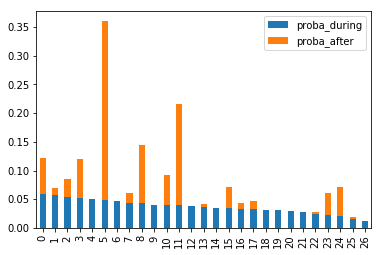

In [67]:
cohort_24_proba[['proba_during', 'proba_after']].plot(kind='bar', stacked=True)


In [68]:
df[df.user == '186']

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 186 24 97.105.19.61,/,186,24,97.105.19.61
2018-05-29 14:43:22,2018-05-29,2019-04-30 14:43:22,html-css 186 24 97.105.19.61,html-css,186,24,97.105.19.61
2018-05-30 10:50:46,2018-05-30,2019-04-30 10:50:46,appendix 186 24 97.105.19.61,appendix,186,24,97.105.19.61
2018-05-30 10:50:52,2018-05-30,2019-04-30 10:50:52,appendix/git/intellij-intro 186 24 97.105.19.61,appendix/git/intellij-intro,186,24,97.105.19.61
2018-05-30 11:47:27,2018-05-30,2019-04-30 11:47:27,html-css 186 24 97.105.19.61,html-css,186,24,97.105.19.61
2018-05-30 11:48:28,2018-05-30,2019-04-30 11:48:28,appendix 186 24 97.105.19.61,appendix,186,24,97.105.19.61
2018-05-30 11:48:32,2018-05-30,2019-04-30 11:48:32,appendix/git/intellij 186 24 97.105.19.61,appendix/git/intellij,186,24,97.105.19.61
2018-05-30 12:58:59,2018-05-30,2019-04-30 12:58:59,appendix/git/cli 186 24 97.105.19.61,appendix/git/cli,186,24,97.105.19.61
2018-05-30 13:35:37,2018-05-30,2019-04-30 13:35:37,html-css 186 24 97.105.19.61,html-css,186,24,97.105.19.61


In [69]:
df[df.user == '189']

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2018-05-29 14:42:45,2018-05-29,2019-04-30 14:42:45,/ 189 24 97.105.19.61,/,189,24,97.105.19.61
2018-05-30 09:06:42,2018-05-30,2019-04-30 09:06:42,html-css 189 24 97.105.19.61,html-css,189,24,97.105.19.61
2018-05-30 09:06:48,2018-05-30,2019-04-30 09:06:48,html-css/introduction 189 24 97.105.19.61,html-css/introduction,189,24,97.105.19.61
2018-05-30 09:06:55,2018-05-30,2019-04-30 09:06:55,html-css 189 24 97.105.19.61,html-css,189,24,97.105.19.61
2018-05-30 09:07:36,2018-05-30,2019-04-30 09:07:36,html-css/introduction 189 24 97.105.19.61,html-css/introduction,189,24,97.105.19.61
2018-05-30 10:50:46,2018-05-30,2019-04-30 10:50:46,appendix 189 24 97.105.19.61,appendix,189,24,97.105.19.61
2018-05-30 10:50:50,2018-05-30,2019-04-30 10:50:50,appendix/git/intellij-intro 189 24 97.105.19.61,appendix/git/intellij-intro,189,24,97.105.19.61
2018-05-30 13:35:26,2018-05-30,2019-04-30 13:35:26,html-css 189 24 97.105.19.61,html-css,189,24,97.105.19.61
2018-05-30 13:37:46,2018-05-30,2019-04-30 13:37:46,html-css/introduction 189 24 97.105.19.61,html-css/introduction,189,24,97.105.19.61


In [70]:
df[df.user == '188']

,date,time,stuff,program,user,cohort,ip
timestamp,,,,,,,
2018-05-29 14:42:44,2018-05-29,2019-04-30 14:42:44,/ 188 24 97.105.19.61,/,188,24,97.105.19.61
2018-05-30 10:50:58,2018-05-30,2019-04-30 10:50:58,/ 188 24 97.105.19.61,/,188,24,97.105.19.61
2018-05-30 10:51:11,2018-05-30,2019-04-30 10:51:11,html-css/introduction 188 24 97.105.19.61,html-css/introduction,188,24,97.105.19.61
2018-05-30 11:46:10,2018-05-30,2019-04-30 11:46:10,appendix/git/intellij-intro 188 24 97.105.19.61,appendix/git/intellij-intro,188,24,97.105.19.61
2018-05-30 11:47:06,2018-05-30,2019-04-30 11:47:06,appendix/git/intellij 188 24 97.105.19.61,appendix/git/intellij,188,24,97.105.19.61
2018-05-30 13:38:15,2018-05-30,2019-04-30 13:38:15,/ 188 24 97.105.19.61,/,188,24,97.105.19.61
2018-05-30 13:38:21,2018-05-30,2019-04-30 13:38:21,html-css/introduction 188 24 97.105.19.61,html-css/introduction,188,24,97.105.19.61
2018-05-30 13:44:11,2018-05-30,2019-04-30 13:44:11,appendix/git/intellij 188 24 97.105.19.61,appendix/git/intellij,188,24,97.105.19.61
2018-05-30 15:16:35,2018-05-30,2019-04-30 15:16:35,html-css/elements 188 24 97.105.19.61,html-css/elements,188,24,97.105.19.61


In [71]:
cohort_24[cohort_24.ip == '170.248.173.246']['user'].unique()

array([201, 186, 189, 188, 197])

# Time Series Anomaly

In [72]:
cohort_24.dtypes

date            datetime64[ns]
time            datetime64[ns]
stuff                   object
program                 object
user                     int64
cohort                   int64
ip                      object
running_days             int64
day_of_week             object
dtype: object

In [73]:
cohort_24.head()

,date,time,stuff,program,user,cohort,ip,running_days,day_of_week
timestamp,,,,,,,,,
2018-05-29 14:42:38,2018-05-29,2019-04-30 14:42:38,/ 182 24 97.105.19.61,/,182,24,97.105.19.61,0,Tuesday
2018-05-29 14:42:39,2018-05-29,2019-04-30 14:42:39,/ 183 24 97.105.19.61,/,183,24,97.105.19.61,0,Tuesday
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 184 24 97.105.19.61,/,184,24,97.105.19.61,0,Tuesday
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 185 24 97.105.19.61,/,185,24,97.105.19.61,0,Tuesday
2018-05-29 14:42:42,2018-05-29,2019-04-30 14:42:42,/ 186 24 97.105.19.61,/,186,24,97.105.19.61,0,Tuesday


In [74]:
my_datetime_fmt = mdates.DateFormatter('%m-%d %H:%T')
df_ts_size = cohort_24['date'].resample('W').count()
idx = pd.date_range(
    df_ts_size.sort_index().index.min(),
    df_ts_size.sort_index().index.max(),
    freq='W'
)
df_ts_size = df_ts_size.reindex(idx, fill_value=0).fillna(value=0)

In [75]:
short_rolling = df_ts_size.rolling(window=3).mean()
long_rolling = df_ts_size.rolling(window=6).mean()

Text(0, 0.5, 'Count')

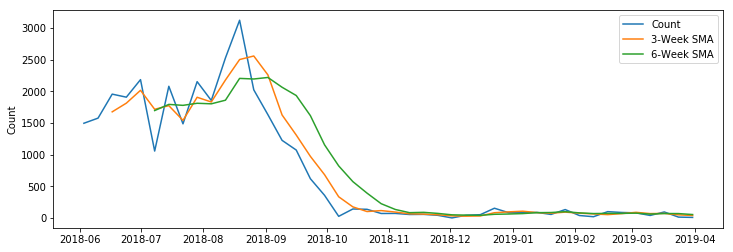

In [76]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_ts_size.index, 
        df_ts_size,
        label='Count')

ax.plot(short_rolling.index, 
        short_rolling, 
        label = '3-Week SMA')
ax.plot(long_rolling.index, 
        long_rolling, 
        label = '6-Week SMA')

ax.legend(loc='best')
ax.set_ylabel('Count')

## It looks like there were a lot of visits to the curriculum right when capstone projects were started.

In [77]:
ema_short = df_ts_size.ewm(span=3, adjust=False).mean()
ema_short[0:3]

2018-06-03    1495.00
2018-06-10    1535.50
2018-06-17    1745.25
Freq: W-SUN, Name: date, dtype: float64

In [78]:
ema_long = df_ts_size.ewm(span=6, adjust=False).mean()
ema_long[0:3]

2018-06-03    1495.000000
2018-06-10    1518.142857
2018-06-17    1642.959184
Freq: W-SUN, Name: date, dtype: float64

In [79]:
span = 6
ema_long = df_ts_size.ewm(span=span, adjust=False).mean()
midband = ema_long[-1]
ub = midband + ema_long[-6:-1].std()*3
lb = midband - ema_long[-6:-1].std()*3

Text(0, 0.5, 'Count')

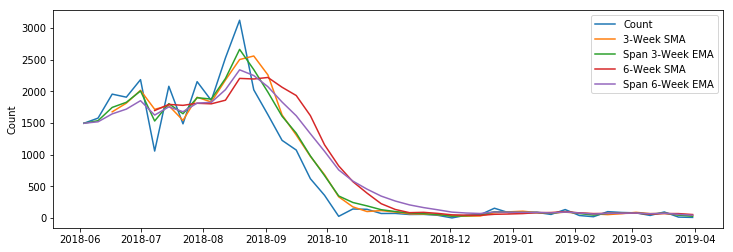

In [80]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_ts_size.index, 
        df_ts_size,
        label='Count')

ax.plot(short_rolling.index, 
        short_rolling, 
        label = '3-Week SMA')
ax.plot(long_rolling.index, 
        ema_short, 
        label = 'Span 3-Week EMA')
ax.plot(long_rolling.index, 
        long_rolling, 
        label = '6-Week SMA')
ax.plot(long_rolling.index, 
        ema_long, 
        label = 'Span 6-Week EMA')

ax.legend(loc='best')
ax.set_ylabel('Count')

# yhat = pd.DataFrame(dict(actual=test))

In [81]:
my_datetime_fmt = mdates.DateFormatter('%m-%d %H:%T')
df_user_count = cohort_24['user'].resample('M').mean()
idx = pd.date_range(
    df_user_count.sort_index().index.min(),
    df_user_count.sort_index().index.max(),
    freq='M'
)
df_user_count = df_user_count.reindex(idx, fill_value=0).fillna(value=0)

In [82]:
short_rolling = df_user_count.rolling(window=2).mean()
long_rolling = df_user_count.rolling(window=4).mean()

Text(0, 0.5, 'Count')

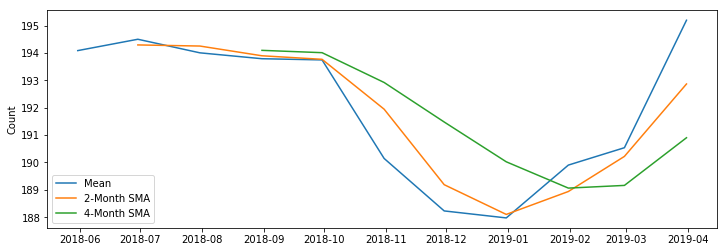

In [83]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_user_count.index, 
        df_user_count,
        label='Mean')

ax.plot(short_rolling.index, 
        short_rolling, 
        label = '2-Month SMA')
ax.plot(long_rolling.index, 
        long_rolling, 
        label = '4-Month SMA')

ax.legend(loc='best')
ax.set_ylabel('Count')

KeyError: 182

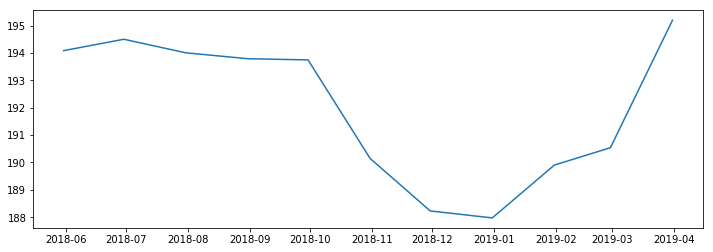

In [91]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(df_user_count.index, 
        df_user_count,
        label='Mean')


for user in users:
    users = list(cohort_24['user'])
    df=cohort_24
    ax.plot(df['date'].groupby(user))

# ax.plot(short_rolling.index, 
#         short_rolling, 
#         label = '2-Month SMA')
# ax.plot(long_rolling.index, 
#         long_rolling, 
#         label = '4-Month SMA')

ax.legend(loc='best')
ax.set_ylabel('Count')